In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
import model

In [2]:
# Load data
diabetes_df = model.load_data()

# Preprocess data
X_resampled, y_resampled, X_test, y_test = model.preprocess_data(diabetes_df)

# Combine resampled and test data for clustering
X_combined = np.vstack((X_resampled, X_test))
y_combined = np.hstack((y_resampled, y_test))

In [3]:
import numpy as np
import model  # Your model.py file

# Run the main function to load data, preprocess, build, train, and save the model
trained_model = model.main()  # This should now return the trained model

# Check if trained_model is None before proceeding
if trained_model is None:
    raise ValueError("The trained_model is None. Ensure that the main() function returns the trained model.")

# Print the summary of the trained model to verify its structure
print("Trained Model Summary:")
trained_model.summary()

# Load and preprocess data again to get X_combined
diabetes_df = model.load_data()
X_resampled, y_resampled, X_test, y_test = model.preprocess_data(diabetes_df)
X_combined = np.vstack((X_resampled, X_test))
y_combined = np.hstack((y_resampled, y_test))

# Create a dummy input with the correct shape to initialize the model
dummy_input = np.zeros((1,) + trained_model.input_shape[1:])  # Create a dummy input with correct shape

# Call the model with the dummy input to initialize it
_ = trained_model(dummy_input)

# Create a feature extractor using Functional API
inputs = trained_model.input  # Get input tensor from trained_model
outputs = trained_model.layers[-2].output  # Accessing second-to-last layer output

# Create feature extractor model
feature_extractor = Model(inputs=inputs, outputs=outputs)

# Extract features from combined data
features = feature_extractor.predict(X_combined)

print("Features shape:", features.shape)

for layer in trained_model.layers:
    print(layer.name)

Epoch 1/30
1772/1772 [==============================] - 2s 952us/step - loss: 0.5587 - accuracy: 0.7086 - val_loss: 0.5538 - val_accuracy: 0.7055
Epoch 2/30
1772/1772 [==============================] - 2s 864us/step - loss: 0.5211 - accuracy: 0.7393 - val_loss: 0.5158 - val_accuracy: 0.7225
Epoch 3/30
1772/1772 [==============================] - 2s 868us/step - loss: 0.5175 - accuracy: 0.7429 - val_loss: 0.5125 - val_accuracy: 0.7240
Epoch 4/30
1772/1772 [==============================] - 2s 859us/step - loss: 0.5158 - accuracy: 0.7444 - val_loss: 0.5916 - val_accuracy: 0.6784
Epoch 5/30
1772/1772 [==============================] - 2s 868us/step - loss: 0.5142 - accuracy: 0.7449 - val_loss: 0.4831 - val_accuracy: 0.7517
Epoch 6/30
1772/1772 [==============================] - 2s 858us/step - loss: 0.5133 - accuracy: 0.7452 - val_loss: 0.4491 - val_accuracy: 0.7702
Epoch 7/30
1772/1772 [==============================] - 2s 873us/step - loss: 0.5122 - accuracy: 0.7451 - val_loss: 0.5085 -

c:\Users\josht\anaconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1586/1586 [==============================] - 1s 365us/step
Test Accuracy: 0.7132
Confusion Matrix:
[[ 5732  1265]
 [13288 30451]]
Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.82      0.44      6997
           0       0.96      0.70      0.81     43739

    accuracy                           0.71     50736
   macro avg       0.63      0.76      0.62     50736
weighted avg       0.87      0.71      0.76     50736

Trained Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                352       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
               

In [4]:
# Apply PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.772003   0.12873148]


In [5]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

c:\Users\josht\anaconda3\envs\tf_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


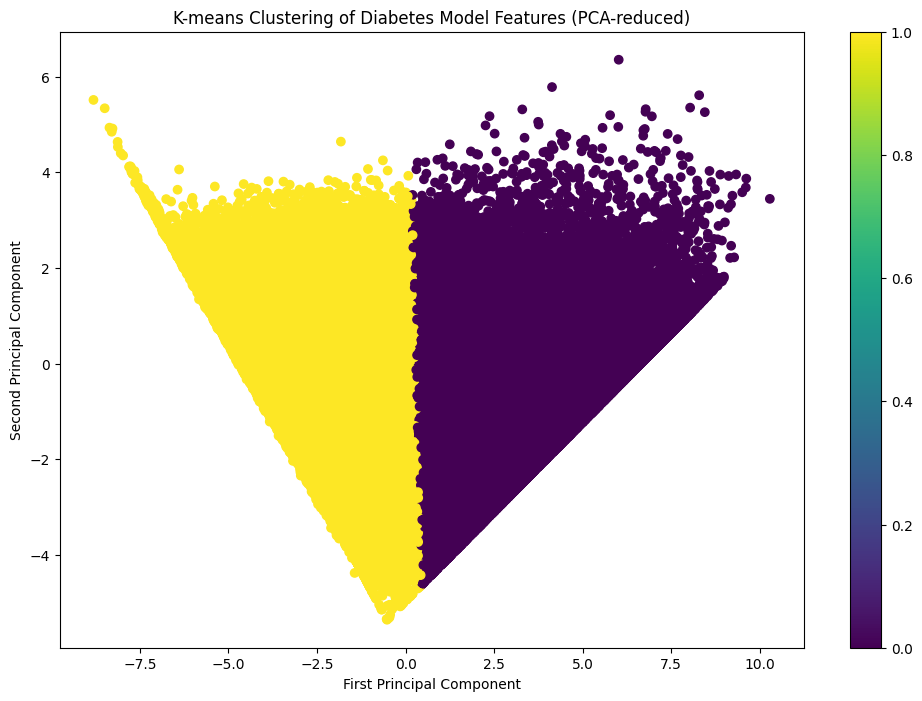

In [6]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Clustering of Diabetes Model Features (PCA-reduced)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

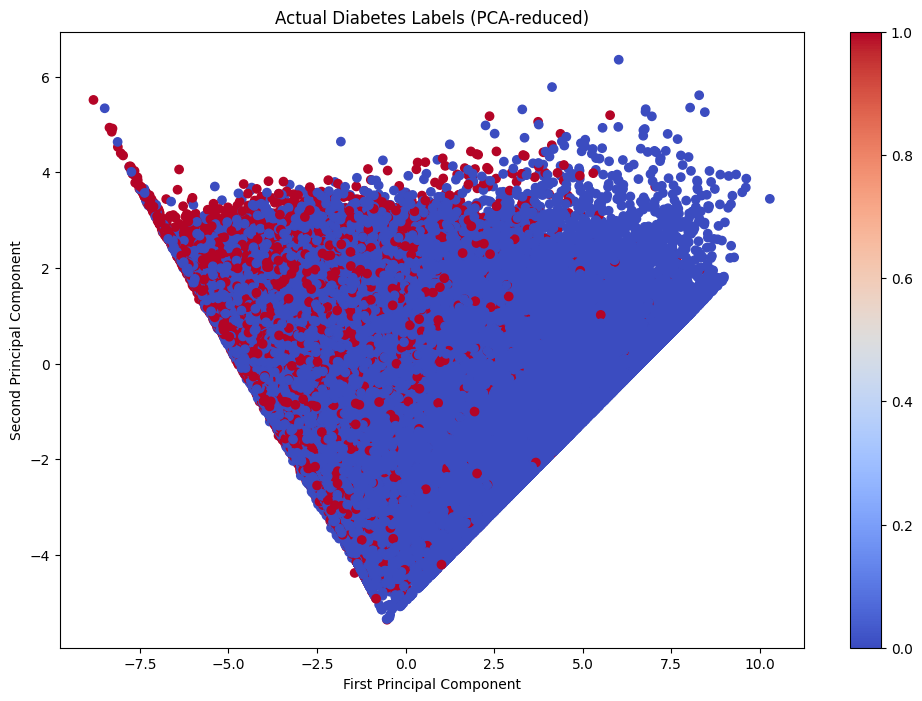

In [7]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_combined, cmap='coolwarm')
plt.colorbar(scatter)
plt.title('Actual Diabetes Labels (PCA-reduced)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

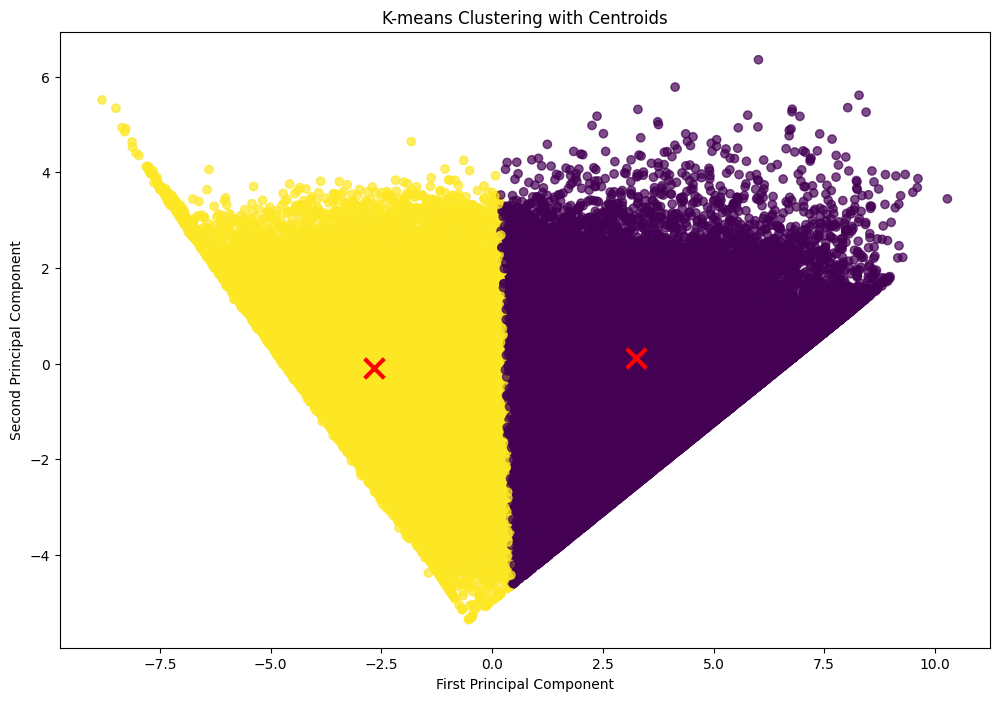

In [8]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot data points and centroids
plt.figure(figsize=(12, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering with Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()